In [13]:
import numpy as np
import pickle
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
model = load_model('model_2019-08-06_02:14:03.806195_augnetwork_withnegs_190804_1424/savedmodel.h5')

In [3]:
x_test = np.load('test_datasets/x_test.npy')
y_test = np.load('test_datasets/y_test.npy')

In [4]:
x_test.shape

(1007, 259, 64, 1)

In [5]:
y_test.shape

(1007, 259, 8)

## IOU

In [6]:
def IoU(predicted, actual):
    overlap = np.sum(np.logical_and(predicted == 1, actual == 1))
    union = np.sum(np.logical_or(predicted == 1, actual == 1))
    IoU = overlap/union
    return IoU

In [7]:
threshold = 0.5
preds_w_threshold = model.predict(x_test)
preds_w_threshold[preds_w_threshold > threshold] = 1
preds_w_threshold[preds_w_threshold <= threshold] = 0
actual = y_test

In [8]:
IoUrecord = []
for i in range(len(x_test)):
    IoUrecord.append(IoU(preds_w_threshold[i], actual[i]))
MeanIoU = sum(IoUrecord)/len(IoUrecord)
MeanIoU

## TPR, TNR, FPR, FNR

In [11]:
TP = np.sum(np.logical_and(preds_w_threshold == 1, actual == 1))
FN = np.sum(np.logical_and(preds_w_threshold == 0, actual == 1))
TN = np.sum(np.logical_and(preds_w_threshold == 0, actual == 0))
FP = np.sum(np.logical_and(preds_w_threshold == 1, actual == 0))
TPR  = TP / (TP + FN)
TNR  = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
print("True Positive Rate: " + str(np.round(TPR, 3)))
print("True Negative Rate: " + str(np.round(TNR, 3)))
print("False Positive Rate: " + str(np.round(FPR, 3)))
print("False Negative Rate: " + str(np.round(FNR, 3)))

True Positive Rate: 0.594
True Negative Rate: 0.989
False Positive Rate: 0.011
False Negative Rate: 0.406


## ROC AUC

In [18]:
predicted = model.predict(x_test)
actual = y_test

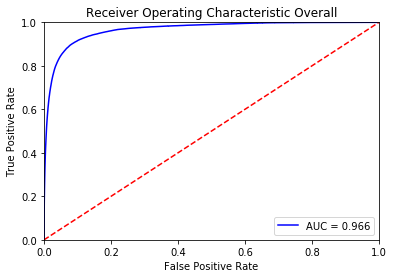

In [19]:
fpr, tpr, thresholds = roc_curve(actual.ravel(), predicted.ravel(), pos_label=None)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic Overall')
plt.plot(fpr, tpr, 'b', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.close()

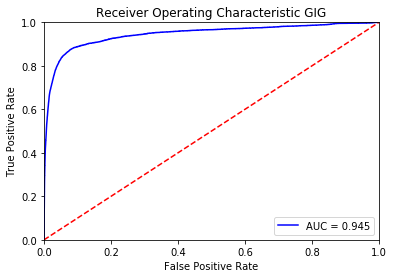

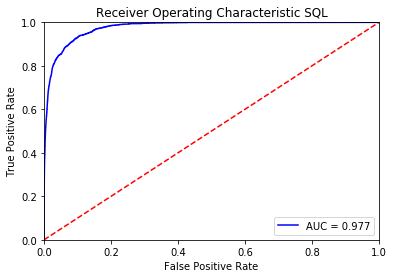

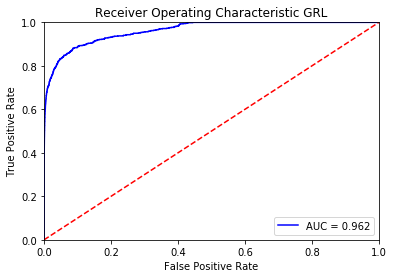

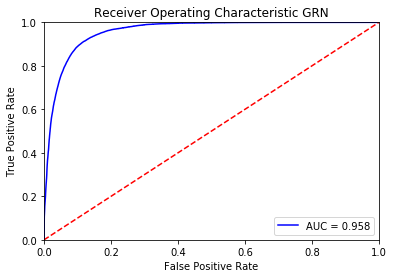

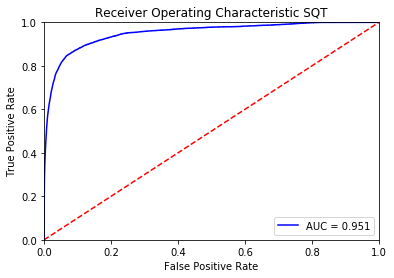

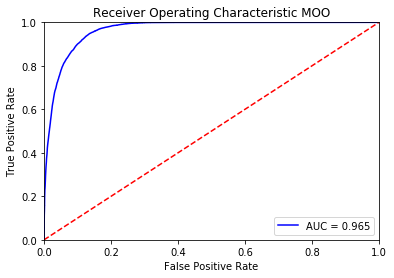

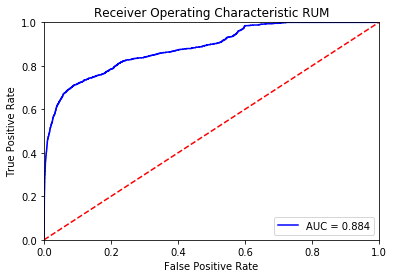

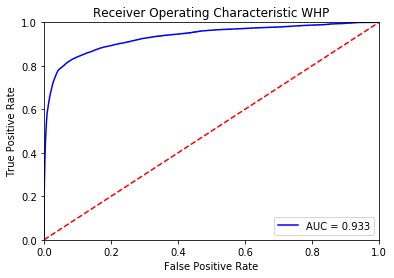

In [20]:
class_names = ['GIG', 'SQL', 'GRL', 'GRN', 'SQT', 'MOO', 'RUM', 'WHP']
for i in range(len(class_names)):
    fpr, tpr, thresholds = roc_curve(actual[:,:,i].ravel(), predicted[:,:,i].ravel(), pos_label=None)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic ' + class_names[i])
    plt.plot(fpr, tpr, 'b', label='AUC = %0.3f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    plt.close()